<a href="https://colab.research.google.com/github/jithesh9539/Homework_9b_Jithesh_Kurungote_Balakrishnan/blob/main/Jithesh_Kurungote_Balakrishnan_Homework_9b_NLP_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install gensim
!pip install transformers
!pip install sentence-transformers
!pip install pyLDAvis
!pip install spacy

     |████████████████████████████████| 4.0 MB 4.4 MB/s 
     |████████████████████████████████| 6.6 MB 31.4 MB/s 
     |████████████████████████████████| 596 kB 38.8 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
     |████████████████████████████████| 895 kB 40.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 79 kB 3.7 MB/s 
     |████████████████████████████████| 1.2 MB 31.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=53f635574ec5d90c02f143377d345c58038b76362b9fee6a2c69658ffebc7219
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements 

In [ ]:
!pip install contractions

     |████████████████████████████████| 287 kB 5.5 MB/s 
     |████████████████████████████████| 106 kB 42.0 MB/s 


In [ ]:
!pip install -U pandas-profiling

     |████████████████████████████████| 261 kB 5.4 MB/s 
     |████████████████████████████████| 690 kB 35.5 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 10.9 MB 38.0 MB/s 
     |████████████████████████████████| 3.1 MB 20.5 MB/s 
     |████████████████████████████████| 102 kB 10.7 MB/s 
     |████████████████████████████████| 303 kB 43.3 MB/s 
     |████████████████████████████████| 812 kB 33.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=0693bc0dc25000ecb360530c0e63e7a2c048e35af05fd41a41c4049f97bc282d
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=395b218f853ce076e5b547847c56038b9f8d4162ebb87d1771de9191a60c1b36
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3

In [ ]:
import pandas as pd
import bs4 as bs
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import wordcloud
import nltk
import unicodedata
import contractions
import pickle
import urllib.request
import requests
import spacy
import json
%matplotlib inline

from bs4 import BeautifulSoup
from bs4.element import Comment
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from collections import defaultdict
from contractions import contractions_dict
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline

from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from sentence_transformers import SentenceTransformer, util
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from spacy import displacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from contractions import contractions_dict
from scipy import stats
from scipy import sparse

import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
scaler = MinMaxScaler()
std_scaler = StandardScaler()
stops = set(stopword_list)
stemmer = nltk.stem.SnowballStemmer('english')
wordlemmatizer = WordNetLemmatizer()
tokenizer = nltk.word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
def beautify_txt(text):
    final_data = (((text).replace(u'\xa0', u' ')).replace(r'\r',u'\n').replace(r'\n', ' '))
    return final_data

Robert_Frost_Poem=["https://allpoetry.com/A-Late-Walk",
"https://allpoetry.com/poem/12277774--A-Minor-Bird---by-Robert-Frost-by-Robert-Frost","https://allpoetry.com/Asking-For-Roses",
"https://allpoetry.com/A-Boundless-Moment","https://allpoetry.com/A-Brook-In-The-City","https://allpoetry.com/poem/11503372-A-Cabin-In-The-Clearing-by-Robert-Frost",
"https://allpoetry.com/A-Cliff-Dwelling","https://allpoetry.com/A-Dream-Pang","https://allpoetry.com/A-Prayer-In-Spring",
"https://allpoetry.com/Acceptance"]

CJ_Dennis_Poem=["https://allpoetry.com/'Stone-the-Crows'","https://allpoetry.com/'A-Gallant-Gentleman'",
"https://allpoetry.com/A-Fair-Risk","https://allpoetry.com/A-Fair-Exchange","https://allpoetry.com/A-Dogs'-View",
"https://allpoetry.com/A-Different-Route","https://allpoetry.com/A-Blind-Man-in-the-Street","https://allpoetry.com/'The-Yellow-Tailed-Thornbill'",
"https://allpoetry.com/'Stone-the-Crows'","https://allpoetry.com/'Bosses-Don't-Seem-Right'---A-Christmas-Monologue"]   

poems_results_RF=[]
def scrapeRobertFrostPoetsPoems():
  for url in Robert_Frost_Poem:
    print(url)
    header = {'User-Agent':'Mozilla/5.0'}
    requests = urllib.request.Request(url,headers=header)
    requestread = urllib.request.urlopen(requests).read()
    soup = bs.BeautifulSoup(requestread,'html.parser')
    poem_content = (beautify_txt(soup.find_all('div', class_="poem_body")[0].text))
    poem_title = soup.find_all('h1')[0].text
    poems_results_RF.append([poem_title, poem_content])
  return poems_results_RF

In [ ]:
poems_results_CJD=[]
def scrapeCJDPoetsPoems():
  for url in CJ_Dennis_Poem:
    print(url)
    header = {'User-Agent':'Mozilla/5.0'}
    requests = urllib.request.Request(url,headers=header)
    requestread = urllib.request.urlopen(requests).read()
    soup = bs.BeautifulSoup(requestread,'html.parser')
    poem_content = (beautify_txt(soup.find_all('div', class_="poem_body")[0].text))
    poem_title = soup.find_all('h1')[0].text
    poems_results_CJD.append([poem_title, poem_content])
  return poems_results_CJD

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
scrapeCJDPoetsPoems=scrapeCJDPoetsPoems()

https://allpoetry.com/'Stone-the-Crows'
https://allpoetry.com/'A-Gallant-Gentleman'
https://allpoetry.com/A-Fair-Risk
https://allpoetry.com/A-Fair-Exchange
https://allpoetry.com/A-Dogs'-View
https://allpoetry.com/A-Different-Route
https://allpoetry.com/A-Blind-Man-in-the-Street
https://allpoetry.com/'The-Yellow-Tailed-Thornbill'
https://allpoetry.com/'Stone-the-Crows'
https://allpoetry.com/'Bosses-Don't-Seem-Right'---A-Christmas-Monologue


In [ ]:
scrapeRobertFrostPoetsPoems=scrapeRobertFrostPoetsPoems()

https://allpoetry.com/A-Late-Walk
https://allpoetry.com/poem/12277774--A-Minor-Bird---by-Robert-Frost-by-Robert-Frost
https://allpoetry.com/Asking-For-Roses
https://allpoetry.com/A-Boundless-Moment
https://allpoetry.com/A-Brook-In-The-City
https://allpoetry.com/poem/11503372-A-Cabin-In-The-Clearing-by-Robert-Frost
https://allpoetry.com/A-Cliff-Dwelling
https://allpoetry.com/A-Dream-Pang
https://allpoetry.com/A-Prayer-In-Spring
https://allpoetry.com/Acceptance


In [ ]:
RF_DF=pd.DataFrame(scrapeRobertFrostPoetsPoems)
CJD_DF=pd.DataFrame(scrapeCJDPoetsPoems)

In [ ]:
RF_DF.columns=['Title','Poem']
CJD_DF.columns=['Title','Poem']

In [ ]:
RF_DF.head()

Title  \
0                      A Late Walk   
1   A Minor Bird,  by Robert Frost   
2                 Asking For Roses   
3               A Boundless Moment   
4              A Brook In The City   

                                                Poem  
0  When I go up through the mowing field,\nThe he...  
1  I have wished a bird would fly away,\nAnd not ...  
2  A house that lacks, seemingly, mistress and ma...  
3  He halted in the wind, and — what was that\nFa...  
4  The farmhouse lingers, though averse to square...

In [ ]:
CJD_DF.head()

Title                                               Poem
0      'Stone the Crows'  "Why stone the crows!" 'e sez.  "I like 'er st...
1  'A Gallant Gentleman'  A month ago the world grew grey fer me;\n   A ...
2            A Fair Risk  Rashly I shot an arrow in the air,\n   And, as...
3        A Fair Exchange  Would you be much impressed, my dear,\n   Now ...
4           A Dogs' View  I'm only just a common racing dog,\n   Simple ...

In [ ]:
RF_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   10 non-null     object
 1   Poem    10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [ ]:
CJD_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   10 non-null     object
 1   Poem    10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [ ]:
!pip install bert-embedding

     |████████████████████████████████| 209 kB 5.6 MB/s 
     |████████████████████████████████| 29.6 MB 57.5 MB/s 
     |████████████████████████████████| 13.8 MB 21.2 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-py3-none-any.whl size=259930 sha256=254ba4053697ca365fda20ea40f2375c35cb71175af6f239556310da39969136
  Stored in directory: /root/.cache/pip/wheels/a6/41/8f/45bd1c58055d87aee5a71b6756a427ea8d92e506b3a9d17370
Successfully built gluonnlp
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly

**Clean Poem**

In [ ]:
def cleanPoemText(text):
    
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'re", " are", text)

    if embedding is not 'BERT':
        text = re.sub(r"[0-9]+", ' ', text)
        text = re.sub(r"-", ' ', text)
    
    
    text = text.strip().lower()
    
    if embedding is 'WORD2VEC_NO_STOP':
        # Removal of Stop words
        default_stop_words = set(stopwords.words('english'))
        default_stop_words.difference_update({'no', 'not', 'nor', 'too', 'any'})
        stop_words = default_stop_words.union({"'m", "n't", "'d", "'re", "'s",
                                               'would','must',"'ve","'ll",'may'})
    
        word_list = word_tokenize(text)
        filtered_list = [w for w in word_list if not w in stop_words]
        text = ' '.join(filtered_list)
    
    if embedding is not 'BERT':
        # Removal of other contractions
        text = re.sub(r"'", ' ', text)
    
    # Replace punctuations with space
    if embedding is 'BERT': # save ! ? . for end of the sentence detection [,/():;']
        filters='"#$%&*+<=>@[\\]^_`{|}~\t\n'
        text = re.sub(r'\!+', '!', text)
        text = re.sub(r'\?+', '?', text)
    else:
        filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    
    if embedding is 'BERT':
        text = re.sub(r'\( *\)', ' ', text)

    if embedding is not 'BERT':
        text = ' '.join([w for w in text.split() if len(w)>1])

    # Replace multiple space with one space
    text = re.sub(' +', ' ', text)
    
    text = ''.join(text)

    return text

In [ ]:
embedding = ''
# for Word2Vec with stop words
RF_DF['Poem'] = RF_DF['Poem'].apply(cleanPoemText)
RF_DF.head(1)

Title                                               Poem  \
0  A Late Walk  when go up through the mowing field the headle...   

                                          Clean_Poem  
0  when go up through the mowing field the headle...

In [ ]:
RF_json = RF_DF.to_json(orient = "records")
parsed_rf = json.loads(RF_json)
json.dumps(parsed_rf, indent=4)

'[\n    {\n        "Title": "A Late Walk",\n        "Poem": "when go up through the mowing field the headless aftermath smooth laid like thatch with the heavy dew half closes the garden path and when come to the garden ground the whir of sober birds up from the tangle of withered weeds is sadder than any words tree beside the wall stands bare but leaf that lingered brown disturbed doubt not by my thought comes softly rattling down end not far from my going forth by picking the faded blue of the last remaining aster flower to carry again to you by owner provided at no charge for educational purposes",\n        "Clean_Poem": "when go up through the mowing field the headless aftermath smooth laid like thatch with the heavy dew half closes the garden path and when come to the garden ground the whir of sober birds up from the tangle of withered weeds is sadder than any words tree beside the wall stands bare but leaf that lingered brown disturbed doubt not by my thought comes softly rattling

In [ ]:
embedding = ''
# for Word2Vec with stop words
CJD_DF['Poem'] = CJD_DF['Poem'].apply(cleanPoemText)
CJD_DF.head(1)

Title                                               Poem  \
0  'Stone the Crows'  why stone the crows sez like er style but alwi...   

                                          Clean_Poem  
0  why stone the crows sez like er style but alwi...

In [ ]:
CJD_json = CJD_DF.to_json(orient = "records")
parsed_cjd = json.loads(CJD_json)
json.dumps(parsed_cjd, indent=4)

'[\n    {\n        "Title": "\'Stone the Crows\'",\n        "Poem": "why stone the crows sez like er style but alwiz some ow women ave appeared set fer to old me orf arf mile dunno wot agin me raps me beard but some ow when speak em soft they run ai not no ladies man sez danny dunn like er style sez wot er name rose the neatest filly that ever see she run in double splendid but pose she never arness with the likes uv me wot age you tell me risin twenty nine well stone the flamin crows she do me fine wonder can she milk do not look that kind but even if she do not would not care not much stone all the crows arf mind to ave shave an ang me at up there but ai not got the knack uv it yeh know or been spliced this twenty year ago ole danny dunn as been to pay is call an tell us will be settlin down ere soon lobbed in on us sudden ziff an all an ai not done nothin all the afternoon but lap up tea an stare pop eyed at rose ai not said nothin much but stone the crows now as sees im orf down by

In [ ]:
print(parsed_rf)

[{'Title': 'A Late Walk', 'Poem': 'when go up through the mowing field the headless aftermath smooth laid like thatch with the heavy dew half closes the garden path and when come to the garden ground the whir of sober birds up from the tangle of withered weeds is sadder than any words tree beside the wall stands bare but leaf that lingered brown disturbed doubt not by my thought comes softly rattling down end not far from my going forth by picking the faded blue of the last remaining aster flower to carry again to you by owner provided at no charge for educational purposes'}, {'Title': ' A Minor Bird,  by Robert Frost', 'Poem': 'have wished bird would fly away and not sing by my house all day have clapped my hands at him from the door when it seemed as if could bear no more the fault must partly have been in me the bird was not to blame for his key and of course there must be something wrong in wanting to silence any song let all voices be heard by owner provided at no charge for educa

In [ ]:
print(parsed_cjd)

[{'Title': "'Stone the Crows'", 'Poem': 'why stone the crows sez like er style but alwiz some ow women ave appeared set fer to old me orf arf mile dunno wot agin me raps me beard but some ow when speak em soft they run ai not no ladies man sez danny dunn like er style sez wot er name rose the neatest filly that ever see she run in double splendid but pose she never arness with the likes uv me wot age you tell me risin twenty nine well stone the flamin crows she do me fine wonder can she milk do not look that kind but even if she do not would not care not much stone all the crows arf mind to ave shave an ang me at up there but ai not got the knack uv it yeh know or been spliced this twenty year ago ole danny dunn as been to pay is call an tell us will be settlin down ere soon lobbed in on us sudden ziff an all an ai not done nothin all the afternoon but lap up tea an stare pop eyed at rose ai not said nothin much but stone the crows now as sees im orf down by the gate chirpin love songs

**Json_Structure**

In [ ]:
robert_frost = {

}

cj_dennis = {

}

In [ ]:
# POS Tagging
def pos_tagging(Poem):
  tokenized_text = word_tokenize(Poem)
  pos_tags= nltk.pos_tag(tokenized_text)
  return pos_tags

In [ ]:
for i in parsed_rf:
  i['POS'] = pos_tagging(i['Poem'])
  i['Verb']= ([word for (word, pos) in i['POS'] if (pos.startswith('VB'))])
  i['Adjective']= ([word for (word, pos) in i['POS'] if (pos.startswith('J'))])
  i['Noun']= ([word for (word, pos) in i['POS'] if (pos.startswith('NN'))])

for i in parsed_cjd:
  i['POS'] = pos_tagging(i['Poem'])
  i['Verb']= ([word for (word, pos) in i['POS'] if (pos.startswith('VB'))])
  i['Adjective']= ([word for (word, pos) in i['POS'] if (pos.startswith('J'))])
  i['Noun']= ([word for (word, pos) in i['POS'] if (pos.startswith('NN'))])



In [ ]:
embedding = ''
def buildPoemArray(poet, data):
  poems = []
  for i in data:
    poem = i["Poem"]

    clean_poem = cleanPoemText(poem)
    idx = "poem" + str(i)
    poet[idx] = clean_poem
    poems.append(idx)
  poet['poems_array'] = poems

In [ ]:
buildPoemArray(robert_frost,parsed_rf )
buildPoemArray(cj_dennis, parsed_cjd)

In [ ]:
robert_frost

{'poems_array': ["poem{'Title': 'A Late Walk', 'Poem': 'when go up through the mowing field the headless aftermath smooth laid like thatch with the heavy dew half closes the garden path and when come to the garden ground the whir of sober birds up from the tangle of withered weeds is sadder than any words tree beside the wall stands bare but leaf that lingered brown disturbed doubt not by my thought comes softly rattling down end not far from my going forth by picking the faded blue of the last remaining aster flower to carry again to you by owner provided at no charge for educational purposes', 'POS': [('when', 'WRB'), ('go', 'VB'), ('up', 'RP'), ('through', 'IN'), ('the', 'DT'), ('mowing', 'NN'), ('field', 'NN'), ('the', 'DT'), ('headless', 'JJ'), ('aftermath', 'NN'), ('smooth', 'NN'), ('laid', 'VBN'), ('like', 'IN'), ('thatch', 'NN'), ('with', 'IN'), ('the', 'DT'), ('heavy', 'JJ'), ('dew', 'NN'), ('half', 'NN'), ('closes', 'VBZ'), ('the', 'DT'), ('garden', 'JJ'), ('path', 'NN'), ('a

In [ ]:
cj_dennis

{'poems_array': ['poem{\'Title\': "\'Stone the Crows\'", \'Poem\': \'why stone the crows sez like er style but alwiz some ow women ave appeared set fer to old me orf arf mile dunno wot agin me raps me beard but some ow when speak em soft they run ai not no ladies man sez danny dunn like er style sez wot er name rose the neatest filly that ever see she run in double splendid but pose she never arness with the likes uv me wot age you tell me risin twenty nine well stone the flamin crows she do me fine wonder can she milk do not look that kind but even if she do not would not care not much stone all the crows arf mind to ave shave an ang me at up there but ai not got the knack uv it yeh know or been spliced this twenty year ago ole danny dunn as been to pay is call an tell us will be settlin down ere soon lobbed in on us sudden ziff an all an ai not done nothin all the afternoon but lap up tea an stare pop eyed at rose ai not said nothin much but stone the crows now as sees im orf down by

In [ ]:
robert_frost_poems=robert_frost.copy()
cj_dennis_poems=cj_dennis.copy()

**Parts of Speech: Extract Verbs, adjectives and Nouns** 

---



---



In [ ]:
def getPOS(poet):
  global_vrb= set()
  global_nns= set()
  global_adj= set()
  for key in poet['poems_array']:
    text = poet[key]
    wrd_list = word_tokenize(text)
    pos_val = nltk.pos_tag(wrd_list)
    poet["pos_"+key] = pos_val

    vrb = set([word for (word, pos) in pos_val if (pos.startswith('VB'))])
    nns = set([word for (word, pos) in pos_val if (pos.startswith('NN'))])
    adj = set([word for (word, pos) in pos_val if (pos.startswith('JJ'))])

    poet["verbs_"+key] = list(vrb)
    poet["adjectives_"+key] = list(adj)
    poet["nouns_"+key] = list(nns)

    global_vrb = set.union(global_vrb, vrb)
    global_nns = set.union(global_nns, nns)
    global_adj = set.union(global_adj, adj)

  poet['all_verbs'] = list(global_vrb)
  poet['all_nouns'] = list(global_nns)
  poet['all_adjectives'] = list(global_adj)

In [ ]:
robert_frost_pos = robert_frost.copy()
getPOS(robert_frost_pos)
robert_frost_pos

{"adjectives_poem{'Title': ' A Minor Bird,  by Robert Frost', 'Poem': 'have wished bird would fly away and not sing by my house all day have clapped my hands at him from the door when it seemed as if could bear no more the fault must partly have been in me the bird was not to blame for his key and of course there must be something wrong in wanting to silence any song let all voices be heard by owner provided at no charge for educational purposes', 'POS': [('have', 'VB'), ('wished', 'VBN'), ('bird', 'NN'), ('would', 'MD'), ('fly', 'VB'), ('away', 'RB'), ('and', 'CC'), ('not', 'RB'), ('sing', 'JJ'), ('by', 'IN'), ('my', 'PRP$'), ('house', 'NN'), ('all', 'DT'), ('day', 'NN'), ('have', 'VBP'), ('clapped', 'VBN'), ('my', 'PRP$'), ('hands', 'NNS'), ('at', 'IN'), ('him', 'PRP'), ('from', 'IN'), ('the', 'DT'), ('door', 'NN'), ('when', 'WRB'), ('it', 'PRP'), ('seemed', 'VBD'), ('as', 'IN'), ('if', 'IN'), ('could', 'MD'), ('bear', 'VB'), ('no', 'DT'), ('more', 'JJR'), ('the', 'DT'), ('fault', 'N

In [ ]:
cj_dennis_pos = cj_dennis.copy()
getPOS(cj_dennis_pos)
cj_dennis_pos

{'adjectives_poem{\'Title\': "\'A Gallant Gentleman\'", \'Poem\': \'month ago the world grew grey fer me month ago the light went out fer rose to er they broke it gentle as might be but fer is pal twus one uv them swift blows that stops the eart beat fer to me it came jist killed in action an beneath is name ow many times ave sat dreamin ere an seen the boys returnin gay an proud have seen the greetin eard is rousin cheer an watched ole mick come stridin thro the crowd ow many times ave sat in this chair an seen is ard chiv grinnin over there laughed an told me stories uv the war changed some looked but still the same ole mick keener an cleaner than wus before took me and an said in great nick sich wus the dreamin uv fool oo tried to jist crack ardy an old gloom aside an now well wot the odds only one one out uv many oo as lost friend manlike will bounce again an find me fun but fer poor rose it seems the bitter end fer rose an sich as rose when one man dies it seems the world goes bla

**Store the POS JSON Data to a File**

In [ ]:
with open('Robert_Frost_Pos.json', 'w') as jsonfile:
  json.dump(robert_frost_pos, jsonfile)

In [ ]:
with open('CJ_Dennis_Pos.json', 'w') as jsonfile:
  json.dump(cj_dennis_pos, jsonfile)

**Summarization using transformers**

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base", framework="tf")

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

In [ ]:
def getSummaryOfPoem(poet):
  def removeQuotes(mydata):
    new_data = mydata.strip('“”')
    return new_data
  count = 0
  for key in poet['poems_array']:
    count += 1;
    text = poet[key] 
    text = removeQuotes(text)
    summary_text = summarizer(text, max_length=512, min_length=5, do_sample=False)[0]['summary_text']
    poet["summary_"+key] = summary_text
  
  return poet

In [ ]:
from time import gmtime, strftime
print (strftime("%Y-%m-%d %H:%M:%S", gmtime()))

from time import gmtime, strftime
print (strftime("%Y-%m-%d %H:%M:%S", gmtime()))

import timeit

start = timeit.default_timer()

2022-04-18 21:02:14
2022-04-18 21:02:14


In [ ]:
robert_frost_sum = robert_frost.copy()
cj_dennis_sum = cj_dennis.copy()
data_robert_frost = getSummaryOfPoem(robert_frost_sum)
data_cj_dennis = getSummaryOfPoem(cj_dennis_sum)

Your max_length is set to 512, but you input_length is only 127. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)
Your max_length is set to 512, but you input_length is only 85. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)
Your max_length is set to 512, but you input_length is only 279. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=139)
Your max_length is set to 512, but you input_length is only 126. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)
Your max_length is set to 512, but you input_length is only 234. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=117)
Your max_length is set to 512, but you input_length is only 427. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=213)
Your max_length is set to 512, but you input_length is only 103. You might

In [ ]:
stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  1399.278523385


In [ ]:
data_robert_frost

{'poems_array': ["poem{'Title': 'A Late Walk', 'Poem': 'when go up through the mowing field the headless aftermath smooth laid like thatch with the heavy dew half closes the garden path and when come to the garden ground the whir of sober birds up from the tangle of withered weeds is sadder than any words tree beside the wall stands bare but leaf that lingered brown disturbed doubt not by my thought comes softly rattling down end not far from my going forth by picking the faded blue of the last remaining aster flower to carry again to you by owner provided at no charge for educational purposes', 'POS': [('when', 'WRB'), ('go', 'VB'), ('up', 'RP'), ('through', 'IN'), ('the', 'DT'), ('mowing', 'NN'), ('field', 'NN'), ('the', 'DT'), ('headless', 'JJ'), ('aftermath', 'NN'), ('smooth', 'NN'), ('laid', 'VBN'), ('like', 'IN'), ('thatch', 'NN'), ('with', 'IN'), ('the', 'DT'), ('heavy', 'JJ'), ('dew', 'NN'), ('half', 'NN'), ('closes', 'VBZ'), ('the', 'DT'), ('garden', 'JJ'), ('path', 'NN'), ('a

In [ ]:
data_cj_dennis

{'poems_array': ['poem{\'Title\': "\'Stone the Crows\'", \'Poem\': \'why stone the crows sez like er style but alwiz some ow women ave appeared set fer to old me orf arf mile dunno wot agin me raps me beard but some ow when speak em soft they run ai not no ladies man sez danny dunn like er style sez wot er name rose the neatest filly that ever see she run in double splendid but pose she never arness with the likes uv me wot age you tell me risin twenty nine well stone the flamin crows she do me fine wonder can she milk do not look that kind but even if she do not would not care not much stone all the crows arf mind to ave shave an ang me at up there but ai not got the knack uv it yeh know or been spliced this twenty year ago ole danny dunn as been to pay is call an tell us will be settlin down ere soon lobbed in on us sudden ziff an all an ai not done nothin all the afternoon but lap up tea an stare pop eyed at rose ai not said nothin much but stone the crows now as sees im orf down by

**Store the summarized JSON Data to File**

In [ ]:
with open('Robert_Frost_Summary.json', 'w') as jsonfile:
  json.dump(data_robert_frost, jsonfile)

In [ ]:
with open('CJ_Dennis_Summary.json', 'w') as jsonfile:
  json.dump(data_cj_dennis, jsonfile)

**Interchange the Verbs and Adjectives for both the poets using transformer**

In [ ]:
model = SentenceTransformer('stsb-roberta-large')

Downloading:   0%|          | 0.00/748 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/674 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

In [ ]:
def getSemanticSimilarity(p1,p2):
  embedding1 = model.encode(p1, convert_to_tensor=True)
  embedding2 = model.encode(p2, convert_to_tensor=True)
  cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
  print(cosine_scores) 
  similarity_score = cosine_scores.item()
  return similarity_score

In [ ]:
getSemanticSimilarity(robert_frost_pos['all_verbs'][0],cj_dennis_pos["all_verbs"][0])

tensor([[0.3060]], device='cuda:0')


0.30598020553588867

**Swapping the verbs based on the similarity score**

In [ ]:
def swapVerbs(p1,p2,text):
    for v1 in p1:
      for v2 in p2:
        score = getSemanticSimilarity(v1,v2)
        if score > 0.3:
          text = text.replace(v1,v2)
          print("verb")
          print(text)
          break
    return text

**Swapping the Adjectives based on similarity score**

In [ ]:
def swapAdjectives(p1,p2, poem):
  text = poem
  for a1 in p1:
    for a2 in p2:
      print("inside loop 2")
      print(a1)
      print(a2)
      print(text)
      score = getSemanticSimilarity(a1,a2)
      if score > 0.3:
        text = text.replace(a1,a2)
        print("adjective")
        print(text)
  return text

In [ ]:
def swapIteration(poet1, poet2, text):
    p2_verbs = poet2["all_verbs"]
    p1_verbs = poet1["all_verbs"]
    p2_verbs = p2_verbs[0:2]
    p1_verbs = p1_verbs[0:2]
    print(p1_verbs)
    print(p2_verbs)
    new_text = swapVerbs(p1_verbs, p2_verbs, text)
    print("new text verbs")
    print(new_text)
    # print(text)
    p2_adjectives = poet2["all_adjectives"]
    p1_adjectives = poet1["all_adjectives"]
    p2_adjectives = p2_adjectives[0:2]
    p1_adjectives = p1_adjectives[0:2]
    brand_new_text = swapAdjectives(p1_adjectives, p2_adjectives, new_text)
    print("new text adjectives")
    print(brand_new_text)
    return brand_new_text

**Robert Frost Poems Swapped the Verbs and Adjectives of CJ Dennis Poems**

In [ ]:
robert_frost_poems_2 = robert_frost_poems.copy()
robert_frost_poems_2.pop('poems_array')
robert_frost_poems_swapped=[]
for i in robert_frost_poems:
  print("poems:")
  print(i)
  # inx = 'poem'+str(i);
  poem_str = str(robert_frost_poems[i]);
  print(poem_str)

  robert_frost_poems_swapped.append(swapIteration(robert_frost_pos, cj_dennis_pos, poem_str))

poems:
poem{'Title': 'A Late Walk', 'Poem': 'when go up through the mowing field the headless aftermath smooth laid like thatch with the heavy dew half closes the garden path and when come to the garden ground the whir of sober birds up from the tangle of withered weeds is sadder than any words tree beside the wall stands bare but leaf that lingered brown disturbed doubt not by my thought comes softly rattling down end not far from my going forth by picking the faded blue of the last remaining aster flower to carry again to you by owner provided at no charge for educational purposes', 'POS': [('when', 'WRB'), ('go', 'VB'), ('up', 'RP'), ('through', 'IN'), ('the', 'DT'), ('mowing', 'NN'), ('field', 'NN'), ('the', 'DT'), ('headless', 'JJ'), ('aftermath', 'NN'), ('smooth', 'NN'), ('laid', 'VBN'), ('like', 'IN'), ('thatch', 'NN'), ('with', 'IN'), ('the', 'DT'), ('heavy', 'JJ'), ('dew', 'NN'), ('half', 'NN'), ('closes', 'VBZ'), ('the', 'DT'), ('garden', 'JJ'), ('path', 'NN'), ('and', 'CC'),

**Printing the result of poem after swap**

In [ ]:
robert_frost_poems_swapped

['when go up through the mowing field the headless aftermath smooth laid like thatch with the heavy dew half closes the garden path and when come to the garden ground the whir of sober birds up from the tangle of withered weeds is sadder than any words tree beside the wall stands bare but leaf that lingered brown disturbed doubt not by my thought comes softly rattling down end not far from my going forth by picking the faded blue of the last remaining aster flower to carry again to you by owner provided at no charge for educational purposes',
 'have wished bird would fly away and not sing by my house all day have clapped my hands at him from the door when it seemed as if could bear no more the fault must partly have been in me the bird was not to blame for his key and of course there must be something wrong in wanting to silence any song let all voices be heard by owner provided at no charge for educational purposes',
 'house that lacks seemingly mistress and master with doors that non

**CJ Dennis Poems Swapped Verbs and Adjectives of Robert Frost**

In [ ]:
cj_dennis_poems_swapped = []
cj_dennis_poems_2 = cj_dennis_poems.copy()
cj_dennis_poems_2.pop('poems_array')
for i in cj_dennis_poems:
  print("poems:")
  print(i)
  # inx = 'poem'+str(i);
  poem_str_2 = str(cj_dennis_poems[i]);
  print(poem_str_2)

  cj_dennis_poems_swapped.append(swapIteration(cj_dennis_pos, robert_frost_pos, poem_str_2))

poems:
poem{'Title': "'Stone the Crows'", 'Poem': 'why stone the crows sez like er style but alwiz some ow women ave appeared set fer to old me orf arf mile dunno wot agin me raps me beard but some ow when speak em soft they run ai not no ladies man sez danny dunn like er style sez wot er name rose the neatest filly that ever see she run in double splendid but pose she never arness with the likes uv me wot age you tell me risin twenty nine well stone the flamin crows she do me fine wonder can she milk do not look that kind but even if she do not would not care not much stone all the crows arf mind to ave shave an ang me at up there but ai not got the knack uv it yeh know or been spliced this twenty year ago ole danny dunn as been to pay is call an tell us will be settlin down ere soon lobbed in on us sudden ziff an all an ai not done nothin all the afternoon but lap up tea an stare pop eyed at rose ai not said nothin much but stone the crows now as sees im orf down by the gate chirpin 

In [ ]:
cj_dennis_poems_swapped

['why stone the crows sez like er style but alwiz some ow women ave appeared set fer to much me orf arf mile dunno wot agin me raps me beard but some ow when speak em soft they run ai not no ladies man sez danny dunn like er style sez wot er name rose the neatest filly that ever see she run in double splendid but pose she never arness with the likes uv me wot age you tell me risin twenty nine well stone the flamin crows she do me fine wonder can she milk do not look that kind but even if she do not would not care not much stone all the crows arf mind to ave shave an ang me at up there but ai not got the knack uv it yeh know or been spliced this twenty year ago ole danny dunn as been to pay is call an tell us will be settlin down ere soon lobbed in on us sudden ziff an all an ai not done nothin all the afternoon but lap up tea an stare pop eyed at rose ai not said nothin much but stone the crows now as sees im orf down by the gate chirpin love songs like nestin thrush rose as im by the 

**Swapped Poem**

In [ ]:
def buildSwappedPoemArray(poet,data):
  poems = []
  data_length = len(data)
  for i in range(data_length):
    poem = data[i]
    #clean_poem = cleanPoemText(poem)
    idx = "poem" + str(i)
    poet[idx] = poem
    poems.append(idx)
  poet['poems_swapped_array'] = poems

In [ ]:
robert_frost_swapped = {

}

cj_dennis_swapped = {

}

In [ ]:
buildSwappedPoemArray(robert_frost_swapped,robert_frost_poems_swapped)
buildSwappedPoemArray(cj_dennis_swapped,cj_dennis_poems_swapped)

In [ ]:
robert_frost_swapped

{'poem0': 'when go up through the mowing field the headless aftermath smooth laid like thatch with the heavy dew half closes the garden path and when come to the garden ground the whir of sober birds up from the tangle of withered weeds is sadder than any words tree beside the wall stands bare but leaf that lingered brown disturbed doubt not by my thought comes softly rattling down end not far from my going forth by picking the faded blue of the last remaining aster flower to carry again to you by owner provided at no charge for educational purposes',
 'poem1': 'have wished bird would fly away and not sing by my house all day have clapped my hands at him from the door when it seemed as if could bear no more the fault must partly have been in me the bird was not to blame for his key and of course there must be something wrong in wanting to silence any song let all voices be heard by owner provided at no charge for educational purposes',
 'poem10': '["poem{\'Title\': \'A Late Walk\', \'P

In [ ]:
cj_dennis_swapped

{'poem0': 'why stone the crows sez like er style but alwiz some ow women ave appeared set fer to much me orf arf mile dunno wot agin me raps me beard but some ow when speak em soft they run ai not no ladies man sez danny dunn like er style sez wot er name rose the neatest filly that ever see she run in double splendid but pose she never arness with the likes uv me wot age you tell me risin twenty nine well stone the flamin crows she do me fine wonder can she milk do not look that kind but even if she do not would not care not much stone all the crows arf mind to ave shave an ang me at up there but ai not got the knack uv it yeh know or been spliced this twenty year ago ole danny dunn as been to pay is call an tell us will be settlin down ere soon lobbed in on us sudden ziff an all an ai not done nothin all the afternoon but lap up tea an stare pop eyed at rose ai not said nothin much but stone the crows now as sees im orf down by the gate chirpin love songs like nestin thrush rose as i

In [ ]:
robert_frost_swapped_to_json_file = robert_frost_swapped.copy()
robert_frost_swapped_to_json_file.pop('poems_swapped_array')


cj_dennis_swapped_to_json_file = cj_dennis_swapped.copy()
cj_dennis_swapped_to_json_file.pop('poems_swapped_array')

['poem0',
 'poem1',
 'poem2',
 'poem3',
 'poem4',
 'poem5',
 'poem6',
 'poem7',
 'poem8',
 'poem9']

In [ ]:
robert_frost_swapped_to_json_file

{'poem0': 'when go up through the mowing field the headless aftermath smooth laid like thatch with the heavy dew half closes the garden path and when come to the garden ground the whir of sober birds up from the tangle of withered weeds is sadder than any words tree beside the wall stands bare but leaf that lingered brown disturbed doubt not by my thought comes softly rattling down end not far from my going forth by picking the faded blue of the last remaining aster flower to carry again to you by owner provided at no charge for educational purposes',
 'poem1': 'have wished bird would fly away and not sing by my house all day have clapped my hands at him from the door when it seemed as if could bear no more the fault must partly have been in me the bird was not to blame for his key and of course there must be something wrong in wanting to silence any song let all voices be heard by owner provided at no charge for educational purposes',
 'poem10': '["poem{\'Title\': \'A Late Walk\', \'P

In [ ]:
cj_dennis_swapped_to_json_file

{'poem0': 'why stone the crows sez like er style but alwiz some ow women ave appeared set fer to much me orf arf mile dunno wot agin me raps me beard but some ow when speak em soft they run ai not no ladies man sez danny dunn like er style sez wot er name rose the neatest filly that ever see she run in double splendid but pose she never arness with the likes uv me wot age you tell me risin twenty nine well stone the flamin crows she do me fine wonder can she milk do not look that kind but even if she do not would not care not much stone all the crows arf mind to ave shave an ang me at up there but ai not got the knack uv it yeh know or been spliced this twenty year ago ole danny dunn as been to pay is call an tell us will be settlin down ere soon lobbed in on us sudden ziff an all an ai not done nothin all the afternoon but lap up tea an stare pop eyed at rose ai not said nothin much but stone the crows now as sees im orf down by the gate chirpin love songs like nestin thrush rose as i

In [ ]:
with open('Robert_Frost_Swapped.json', 'w') as jsonfile:
  json.dump(robert_frost_swapped_to_json_file, jsonfile)

In [ ]:
with open('CJ_Dennis_Swapped.json', 'w') as jsonfile:
  json.dump(cj_dennis_swapped_to_json_file, jsonfile)

In [ ]:
robert_frost_coherence_input = robert_frost.copy()
robert_frost_coherence_input.pop('poems_array')
robert_frost_coherence_input

{"poem{'Title': ' A Minor Bird,  by Robert Frost', 'Poem': 'have wished bird would fly away and not sing by my house all day have clapped my hands at him from the door when it seemed as if could bear no more the fault must partly have been in me the bird was not to blame for his key and of course there must be something wrong in wanting to silence any song let all voices be heard by owner provided at no charge for educational purposes', 'POS': [('have', 'VB'), ('wished', 'VBN'), ('bird', 'NN'), ('would', 'MD'), ('fly', 'VB'), ('away', 'RB'), ('and', 'CC'), ('not', 'RB'), ('sing', 'JJ'), ('by', 'IN'), ('my', 'PRP$'), ('house', 'NN'), ('all', 'DT'), ('day', 'NN'), ('have', 'VBP'), ('clapped', 'VBN'), ('my', 'PRP$'), ('hands', 'NNS'), ('at', 'IN'), ('him', 'PRP'), ('from', 'IN'), ('the', 'DT'), ('door', 'NN'), ('when', 'WRB'), ('it', 'PRP'), ('seemed', 'VBD'), ('as', 'IN'), ('if', 'IN'), ('could', 'MD'), ('bear', 'VB'), ('no', 'DT'), ('more', 'JJR'), ('the', 'DT'), ('fault', 'NN'), ('must

In [ ]:
swapped_robert_frost_coherence_input = robert_frost_swapped.copy()
swapped_robert_frost_coherence_input.pop('poems_swapped_array')
swapped_robert_frost_coherence_input

{'poem0': 'when go up through the mowing field the headless aftermath smooth laid like thatch with the heavy dew half closes the garden path and when come to the garden ground the whir of sober birds up from the tangle of withered weeds is sadder than any words tree beside the wall stands bare but leaf that lingered brown disturbed doubt not by my thought comes softly rattling down end not far from my going forth by picking the faded blue of the last remaining aster flower to carry again to you by owner provided at no charge for educational purposes',
 'poem1': 'have wished bird would fly away and not sing by my house all day have clapped my hands at him from the door when it seemed as if could bear no more the fault must partly have been in me the bird was not to blame for his key and of course there must be something wrong in wanting to silence any song let all voices be heard by owner provided at no charge for educational purposes',
 'poem10': '["poem{\'Title\': \'A Late Walk\', \'P

In [ ]:
coherence_perplexity_calculator = cj_dennis.copy()
coherence_perplexity_calculator.pop('poems_array')
coherence_perplexity_calculator

{'poem{\'Title\': "\'A Gallant Gentleman\'", \'Poem\': \'month ago the world grew grey fer me month ago the light went out fer rose to er they broke it gentle as might be but fer is pal twus one uv them swift blows that stops the eart beat fer to me it came jist killed in action an beneath is name ow many times ave sat dreamin ere an seen the boys returnin gay an proud have seen the greetin eard is rousin cheer an watched ole mick come stridin thro the crowd ow many times ave sat in this chair an seen is ard chiv grinnin over there laughed an told me stories uv the war changed some looked but still the same ole mick keener an cleaner than wus before took me and an said in great nick sich wus the dreamin uv fool oo tried to jist crack ardy an old gloom aside an now well wot the odds only one one out uv many oo as lost friend manlike will bounce again an find me fun but fer poor rose it seems the bitter end fer rose an sich as rose when one man dies it seems the world goes black before t

In [ ]:
swapped_coherence_perplexity_calculator = cj_dennis_swapped.copy()
swapped_coherence_perplexity_calculator.pop('poems_swapped_array')
swapped_coherence_perplexity_calculator

{'poem0': 'why stone the crows sez like er style but alwiz some ow women ave appeared set fer to much me orf arf mile dunno wot agin me raps me beard but some ow when speak em soft they run ai not no ladies man sez danny dunn like er style sez wot er name rose the neatest filly that ever see she run in double splendid but pose she never arness with the likes uv me wot age you tell me risin twenty nine well stone the flamin crows she do me fine wonder can she milk do not look that kind but even if she do not would not care not much stone all the crows arf mind to ave shave an ang me at up there but ai not got the knack uv it yeh know or been spliced this twenty year ago ole danny dunn as been to pay is call an tell us will be settlin down ere soon lobbed in on us sudden ziff an all an ai not done nothin all the afternoon but lap up tea an stare pop eyed at rose ai not said nothin much but stone the crows now as sees im orf down by the gate chirpin love songs like nestin thrush rose as i

**Topic Modelling on Combined Texts**

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
def choherence_perplexity_calculator(poem_list):
  def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

  data_words = list(sent_to_words(poem_list))

  print(data_words[:1])
  # Build the bigram and trigram models
  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

  # Faster way to get a sentence clubbed as a trigram/bigram
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)

  # See trigram example
  print(trigram_mod[bigram_mod[data_words[0]]])
  # Define functions for stopwords, bigrams, trigrams and lemmatization
  def remove_stopwords(texts):
      return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

  def make_bigrams(texts):
      return [bigram_mod[doc] for doc in texts]

  def make_trigrams(texts):
      return [trigram_mod[bigram_mod[doc]] for doc in texts]

  def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
      """https://spacy.io/api/annotation"""
      texts_out = []
      for sent in texts:
          doc = nlp(" ".join(sent)) 
          texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
      return texts_out
  # Remove Stop Words
  #data_words_nostops = remove_stopwords(data_words)

  # Form Bigrams
  data_words_bigrams = make_bigrams(data_words)

  # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
  # python3 -m spacy download en
  nlp = spacy.load('en', disable=['parser', 'ner'])

  # Do lemmatization keeping only noun, adj, vb, adv
  data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN']) #, 'ADJ', 'VERB', 'ADV'

  print(data_lemmatized[:1])
  # Create Dictionary
  id2word = corpora.Dictionary(data_lemmatized)

  # Create Corpus
  texts = data_lemmatized

  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]

  # View
  print(corpus[:1])

  # lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
  #                                           id2word=id2word,
  #                                           num_topics=10, 
  #                                           random_state=100,
  #                                           update_every=1,
  #                                           chunksize=100,
  #                                           passes=10,
  #                                           alpha='auto',
  #                                           per_word_topics=True)
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
  print(lda_model.print_topics())
  # Visualize the topics
  pyLDAvis.enable_notebook()
  vis = gensimvis.prepare(lda_model, corpus, id2word)
  # vis
  # Compute Perplexity
  print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)
  return vis

In [ ]:
poem_count = len(robert_frost_coherence_input)
robert_frost_poem_list=[]
for j in robert_frost_coherence_input:
  poem_index =  str(j)
  print(poem_index)
  print(robert_frost_coherence_input[poem_index])
  robert_frost_poem_list.append(robert_frost_coherence_input[poem_index])
print(robert_frost_poem_list)

poem{'Title': 'A Late Walk', 'Poem': 'when go up through the mowing field the headless aftermath smooth laid like thatch with the heavy dew half closes the garden path and when come to the garden ground the whir of sober birds up from the tangle of withered weeds is sadder than any words tree beside the wall stands bare but leaf that lingered brown disturbed doubt not by my thought comes softly rattling down end not far from my going forth by picking the faded blue of the last remaining aster flower to carry again to you by owner provided at no charge for educational purposes', 'POS': [('when', 'WRB'), ('go', 'VB'), ('up', 'RP'), ('through', 'IN'), ('the', 'DT'), ('mowing', 'NN'), ('field', 'NN'), ('the', 'DT'), ('headless', 'JJ'), ('aftermath', 'NN'), ('smooth', 'NN'), ('laid', 'VBN'), ('like', 'IN'), ('thatch', 'NN'), ('with', 'IN'), ('the', 'DT'), ('heavy', 'JJ'), ('dew', 'NN'), ('half', 'NN'), ('closes', 'VBZ'), ('the', 'DT'), ('garden', 'JJ'), ('path', 'NN'), ('and', 'CC'), ('when

**Original Robert Frost Poem's perplexity and coherence score**

In [ ]:
pip install attrs==19.1.0

  Attempting uninstall: attrs
    Found existing installation: attrs 21.4.0
    Uninstalling attrs-21.4.0:
      Successfully uninstalled attrs-21.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
visions 0.7.4 requires attrs>=19.3.0, but you have attrs 19.1.0 which is incompatible.
pandas-profiling 3.1.0 requires numpy>=1.16.0, but you have numpy 1.14.6 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install pandas --upgrade
# !pip install pandas==1.3.1

     |████████████████████████████████| 15.7 MB 336 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
visions 0.7.4 requires attrs>=19.3.0, but you have attrs 19.1.0 which is incompatible.
mxnet 1.4.0 requires numpy<1.15.0,>=1.8.2, but you have numpy 1.21.6 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
bert-embedding 1.0.1 requires numpy==1.14.6, but you have numpy 1.21.6 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you

In [ ]:
robert_frost_vis = choherence_perplexity_calculator(robert_frost_poem_list)

[['when', 'go', 'up', 'through', 'the', 'mowing', 'field', 'the', 'headless', 'aftermath', 'smooth', 'laid', 'like', 'thatch', 'with', 'the', 'heavy', 'dew', 'half', 'closes', 'the', 'garden', 'path', 'and', 'when', 'come', 'to', 'the', 'garden', 'ground', 'the', 'whir', 'of', 'sober', 'birds', 'up', 'from', 'the', 'tangle', 'of', 'withered', 'weeds', 'is', 'sadder', 'than', 'any', 'words', 'tree', 'beside', 'the', 'wall', 'stands', 'bare', 'but', 'leaf', 'that', 'lingered', 'brown', 'disturbed', 'doubt', 'not', 'by', 'my', 'thought', 'comes', 'softly', 'rattling', 'down', 'end', 'not', 'far', 'from', 'my', 'going', 'forth', 'by', 'picking', 'the', 'faded', 'blue', 'of', 'the', 'last', 'remaining', 'aster', 'flower', 'to', 'carry', 'again', 'to', 'you', 'by', 'owner', 'provided', 'at', 'no', 'charge', 'for', 'educational', 'purposes']]
['when', 'go', 'up', 'through', 'the', 'mowing', 'field', 'the', 'headless', 'aftermath', 'smooth', 'laid', 'like', 'thatch', 'with', 'the', 'heavy', 'd

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['mowing', 'field', 'headless', 'thatch', 'dew', 'half', 'garden', 'path', 'garden', 'whir', 'bird', 'tangle', 'weed', 'word', 'tree', 'wall', 'leaf', 'doubt', 'thought', 'end', 'blue', 'aster', 'flower', 'owner', 'charge', 'purpose']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]]
[(0, '0.044*"pleasure" + 0.044*"love" + 0.044*"bee" + 0.023*"night" + 0.023*"bill" + 0.023*"springing" + 0.023*"blossom" + 0.023*"harvest" + 0.023*"orchard" + 0.023*"needle"'), (1, '0.005*"smoke" + 0.005*"mist" + 0.005*"haze" + 0.005*"path" + 0.005*"house" + 0.005*"garden" + 0.005*"world" + 0.005*"day" + 0.005*"charge" + 0.005*"wood"'), (2, '0.053*"forest" + 0.028*"purpose" + 0.028*"leave" + 0.028*"day" + 0.028*"wrong" + 0.028*"proof" + 0.028*"wake" + 0.028*"head" + 0.028*"dream" + 0.028*"owner"'), (3, '0.005*"purpose" + 0.005*"owner" + 0.

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)



Perplexity:  -5.682822091346283

Coherence Score:  0.6227695299722444


In [ ]:
poem_count = len(coherence_perplexity_calculator)
cj_dennis_poem_list=[]
for j in coherence_perplexity_calculator:
  poem_index =  str(j)
  print(poem_index)
  print(coherence_perplexity_calculator[poem_index])
  cj_dennis_poem_list.append(coherence_perplexity_calculator[poem_index])
print(cj_dennis_poem_list)

poem{'Title': "'Stone the Crows'", 'Poem': 'why stone the crows sez like er style but alwiz some ow women ave appeared set fer to old me orf arf mile dunno wot agin me raps me beard but some ow when speak em soft they run ai not no ladies man sez danny dunn like er style sez wot er name rose the neatest filly that ever see she run in double splendid but pose she never arness with the likes uv me wot age you tell me risin twenty nine well stone the flamin crows she do me fine wonder can she milk do not look that kind but even if she do not would not care not much stone all the crows arf mind to ave shave an ang me at up there but ai not got the knack uv it yeh know or been spliced this twenty year ago ole danny dunn as been to pay is call an tell us will be settlin down ere soon lobbed in on us sudden ziff an all an ai not done nothin all the afternoon but lap up tea an stare pop eyed at rose ai not said nothin much but stone the crows now as sees im orf down by the gate chirpin love so

In [ ]:
cj_dennis_vis = choherence_perplexity_calculator(cj_dennis_poem_list)

[['why', 'stone', 'the', 'crows', 'sez', 'like', 'er', 'style', 'but', 'alwiz', 'some', 'ow', 'women', 'ave', 'appeared', 'set', 'fer', 'to', 'old', 'me', 'orf', 'arf', 'mile', 'dunno', 'wot', 'agin', 'me', 'raps', 'me', 'beard', 'but', 'some', 'ow', 'when', 'speak', 'em', 'soft', 'they', 'run', 'ai', 'not', 'no', 'ladies', 'man', 'sez', 'danny', 'dunn', 'like', 'er', 'style', 'sez', 'wot', 'er', 'name', 'rose', 'the', 'neatest', 'filly', 'that', 'ever', 'see', 'she', 'run', 'in', 'double', 'splendid', 'but', 'pose', 'she', 'never', 'arness', 'with', 'the', 'likes', 'uv', 'me', 'wot', 'age', 'you', 'tell', 'me', 'risin', 'twenty', 'nine', 'well', 'stone', 'the', 'flamin', 'crows', 'she', 'do', 'me', 'fine', 'wonder', 'can', 'she', 'milk', 'do', 'not', 'look', 'that', 'kind', 'but', 'even', 'if', 'she', 'do', 'not', 'would', 'not', 'care', 'not', 'much', 'stone', 'all', 'the', 'crows', 'arf', 'mind', 'to', 'ave', 'shave', 'an', 'ang', 'me', 'at', 'up', 'there', 'but', 'ai', 'not', 'got'

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['why', 'stone', 'the', 'crows', 'sez', 'like', 'er', 'style', 'but', 'alwiz', 'some', 'ow', 'women', 'ave', 'appeared', 'set', 'fer', 'to', 'old', 'me', 'orf', 'arf', 'mile', 'dunno', 'wot', 'agin', 'me', 'raps', 'me', 'beard', 'but', 'some', 'ow', 'when', 'speak', 'em', 'soft', 'they', 'run', 'ai', 'not', 'no', 'ladies', 'man', 'sez', 'danny', 'dunn', 'like', 'er', 'style', 'sez', 'wot', 'er', 'name', 'rose', 'the', 'neatest', 'filly', 'that', 'ever', 'see', 'she', 'run', 'in', 'double', 'splendid', 'but', 'pose', 'she', 'never', 'arness', 'with', 'the', 'likes', 'uv', 'me', 'wot', 'age', 'you', 'tell', 'me', 'risin', 'twenty', 'nine', 'well', 'stone', 'the', 'flamin', 'crows', 'she', 'do', 'me', 'fine', 'wonder', 'can', 'she', 'milk', 'do', 'not', 'look', 'that', 'kind', 'but', 'even', 'if', 'she', 'do', 'not', 'would', 'not', 'care', 'not', 'much', 'stone', 'all', 'the', 'crows', 'arf', 'mind', 'to', 'ave', 'shave', 'an', 'ang', 'me', 'at', 'up', 'there', 'but', 'ai', 'not', 'got',

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)



Perplexity:  -6.238167218614857

Coherence Score:  0.6031264418116098


In [ ]:
swapped_robert_frost_poem_list=[]
for j in swapped_robert_frost_coherence_input:
  swapped_poem_index =  str(j)
  print(swapped_poem_index)
  print(swapped_robert_frost_coherence_input[swapped_poem_index])
  swapped_robert_frost_poem_list.append(swapped_robert_frost_coherence_input[swapped_poem_index])
print(swapped_robert_frost_poem_list)

poem0
when go up through the mowing field the headless aftermath smooth laid like thatch with the heavy dew half closes the garden path and when come to the garden ground the whir of sober birds up from the tangle of withered weeds is sadder than any words tree beside the wall stands bare but leaf that lingered brown disturbed doubt not by my thought comes softly rattling down end not far from my going forth by picking the faded blue of the last remaining aster flower to carry again to you by owner provided at no charge for educational purposes
poem1
have wished bird would fly away and not sing by my house all day have clapped my hands at him from the door when it seemed as if could bear no more the fault must partly have been in me the bird was not to blame for his key and of course there must be something wrong in wanting to silence any song let all voices be heard by owner provided at no charge for educational purposes
poem2
house that lacks seemingly mistress and master with doors 

In [ ]:
swapped_cj_dennis_poem_list=[]
for j in swapped_coherence_perplexity_calculator:
  swapped_poem_index =  str(j)
  print(swapped_poem_index)
  print(swapped_coherence_perplexity_calculator[swapped_poem_index])
  swapped_cj_dennis_poem_list.append(swapped_coherence_perplexity_calculator[swapped_poem_index])
print(swapped_cj_dennis_poem_list)

poem0
why stone the crows sez like er style but alwiz some ow women ave appeared set fer to much me orf arf mile dunno wot agin me raps me beard but some ow when speak em soft they run ai not no ladies man sez danny dunn like er style sez wot er name rose the neatest filly that ever see she run in double splendid but pose she never arness with the likes uv me wot age you tell me risin twenty nine well stone the flamin crows she do me fine wonder can she milk do not look that kind but even if she do not would not care not much stone all the crows arf mind to ave shave an ang me at up there but ai not got the knack uv it yeh know or been spliced this twenty year ago ole danny dunn as been to pay is call an tell us will be settlin down ere soon lobbed in on us sudden ziff an all an ai not done nothin all the afternoon but lap up tea an stare pop eyed at rose ai not said nothin much but stone the crows now as sees im orf down by the gate chirpin love songs like nestin thrush rose as im by 

**Swapped Robert Frost Perplexity and Coherence Score**

In [ ]:
swapped_robert_frost_vis = choherence_perplexity_calculator(swapped_robert_frost_poem_list)

[['when', 'go', 'up', 'through', 'the', 'mowing', 'field', 'the', 'headless', 'aftermath', 'smooth', 'laid', 'like', 'thatch', 'with', 'the', 'heavy', 'dew', 'half', 'closes', 'the', 'garden', 'path', 'and', 'when', 'come', 'to', 'the', 'garden', 'ground', 'the', 'whir', 'of', 'sober', 'birds', 'up', 'from', 'the', 'tangle', 'of', 'withered', 'weeds', 'is', 'sadder', 'than', 'any', 'words', 'tree', 'beside', 'the', 'wall', 'stands', 'bare', 'but', 'leaf', 'that', 'lingered', 'brown', 'disturbed', 'doubt', 'not', 'by', 'my', 'thought', 'comes', 'softly', 'rattling', 'down', 'end', 'not', 'far', 'from', 'my', 'going', 'forth', 'by', 'picking', 'the', 'faded', 'blue', 'of', 'the', 'last', 'remaining', 'aster', 'flower', 'to', 'carry', 'again', 'to', 'you', 'by', 'owner', 'provided', 'at', 'no', 'charge', 'for', 'educational', 'purposes']]


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['when', 'go', 'up', 'through', 'the', 'mowing', 'field', 'the', 'headless', 'aftermath', 'smooth', 'laid', 'like', 'thatch', 'with', 'the', 'heavy', 'dew', 'half', 'closes', 'the', 'garden', 'path', 'and', 'when', 'come', 'to', 'the', 'garden', 'ground', 'the', 'whir', 'of', 'sober', 'birds', 'up', 'from', 'the', 'tangle', 'of', 'withered', 'weeds', 'is', 'sadder', 'than', 'any', 'words', 'tree', 'beside', 'the', 'wall', 'stands', 'bare', 'but', 'leaf', 'that', 'lingered', 'brown', 'disturbed', 'doubt', 'not', 'by', 'my', 'thought', 'comes', 'softly', 'rattling', 'down', 'end', 'not', 'far', 'from', 'my', 'going', 'forth', 'by', 'picking', 'the', 'faded', 'blue', 'of', 'the', 'last', 'remaining', 'aster', 'flower', 'to', 'carry', 'again', 'to', 'you', 'by', 'owner', 'provided', 'at', 'no', 'charge', 'for', 'educational', 'purposes']
[['mowing', 'field', 'headless', 'thatch', 'dew', 'half', 'garden', 'path', 'garden', 'whir', 'bird', 'tangle', 'weed', 'word', 'tree', 'wall', 'leaf', 'd

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)



Perplexity:  -5.828750485333138

Coherence Score:  0.39779890202593166


**Swapped CJ Dennis Poem's perplexity and coherence score**

In [ ]:
swapped_cj_dennis_vis = choherence_perplexity_calculator(swapped_cj_dennis_poem_list)

[['why', 'stone', 'the', 'crows', 'sez', 'like', 'er', 'style', 'but', 'alwiz', 'some', 'ow', 'women', 'ave', 'appeared', 'set', 'fer', 'to', 'much', 'me', 'orf', 'arf', 'mile', 'dunno', 'wot', 'agin', 'me', 'raps', 'me', 'beard', 'but', 'some', 'ow', 'when', 'speak', 'em', 'soft', 'they', 'run', 'ai', 'not', 'no', 'ladies', 'man', 'sez', 'danny', 'dunn', 'like', 'er', 'style', 'sez', 'wot', 'er', 'name', 'rose', 'the', 'neatest', 'filly', 'that', 'ever', 'see', 'she', 'run', 'in', 'double', 'splendid', 'but', 'pose', 'she', 'never', 'arness', 'with', 'the', 'likes', 'uv', 'me', 'wot', 'age', 'you', 'tell', 'me', 'risin', 'twenty', 'nine', 'well', 'stone', 'the', 'flamin', 'crows', 'she', 'do', 'me', 'fine', 'wonder', 'can', 'she', 'milk', 'do', 'not', 'look', 'that', 'kind', 'but', 'even', 'if', 'she', 'do', 'not', 'would', 'not', 'care', 'not', 'much', 'stone', 'all', 'the', 'crows', 'arf', 'mind', 'to', 'ave', 'shave', 'an', 'ang', 'me', 'at', 'up', 'there', 'but', 'ai', 'not', 'got

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['why', 'stone', 'the', 'crows', 'sez', 'like', 'er', 'style', 'but', 'alwiz', 'some', 'ow', 'women', 'ave', 'appeared', 'set', 'fer', 'to', 'much', 'me', 'orf', 'arf', 'mile', 'dunno', 'wot', 'agin', 'me', 'raps', 'me', 'beard', 'but', 'some', 'ow', 'when', 'speak', 'em', 'soft', 'they', 'run', 'ai', 'not', 'no', 'ladies', 'man', 'sez', 'danny', 'dunn', 'like', 'er', 'style', 'sez', 'wot', 'er', 'name', 'rose', 'the', 'neatest', 'filly', 'that', 'ever', 'see', 'she', 'run', 'in', 'double', 'splendid', 'but', 'pose', 'she', 'never', 'arness', 'with', 'the', 'likes', 'uv', 'me', 'wot', 'age', 'you', 'tell', 'me', 'risin', 'twenty', 'nine', 'well', 'stone', 'the', 'flamin', 'crows', 'she', 'do', 'me', 'fine', 'wonder', 'can', 'she', 'milk', 'do', 'not', 'look', 'that', 'kind', 'but', 'even', 'if', 'she', 'do', 'not', 'would', 'not', 'care', 'not', 'much', 'stone', 'all', 'the', 'crows', 'arf', 'mind', 'to', 'ave', 'shave', 'an', 'ang', 'me', 'at', 'up', 'there', 'but', 'ai', 'not', 'got'

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)



Perplexity:  -6.314383091003073

Coherence Score:  0.3797306882827638


In [ ]:
import numpy as np 
import pandas as pd

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import spacy

from scipy.spatial.distance import jensenshannon

import joblib

from IPython.display import HTML, display

from ipywidgets import interact, Layout, HBox, VBox, Box
import ipywidgets as widgets
from IPython.display import clear_output

from tqdm import tqdm
from os.path import isfile

import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=4efe7577cc64c0f516d54ec832816972f9a84d8edd97c40b8029ba20cf56e5e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-pehnd77t/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
def spacy_tokenizer(sentence):
    return [word.lemma_ for word in nlp(sentence) if not (word.like_num or word.is_stop or word.is_punct or word.is_space or len(word)==1)]

In [ ]:
vectorizer_robert_frost = CountVectorizer(tokenizer = spacy_tokenizer, min_df=2)
vectorizer_cj_dennis = CountVectorizer(tokenizer = spacy_tokenizer, min_df=2)

data_vectorized_robert_frost = vectorizer_robert_frost.fit_transform(tqdm(robert_frost_poem_list))
data_vectorized_cj_dennis = vectorizer_cj_dennis.fit_transform(tqdm(cj_dennis_poem_list))

100%|██████████| 9/9 [00:00<00:00, 12.37it/s]


**Combine poems, Summarize using tansformer and Save in file**

In [ ]:
def combinePoems(poems, poet):
    poems_ref = []
    all_poems = []
    c = 0
    for i in poems:
      c += 1
      # print(i)
      all_poems.append(i)
      if c == 10:
        break
    p = {'all_poems':all_poems}
    poems_ref.append(p)
    po = {'poet': poet}
    poems_ref.append(po)
    return poems_ref

In [ ]:
cj_dennis_combined = swapped_cj_dennis_poem_list.copy()
cj_dennis_combined = combinePoems(cj_dennis_combined, 'CJ Dennis')
cj_dennis_combined

[{'all_poems': ['why stone the crows sez like er style but alwiz some ow women ave appeared set fer to much me orf arf mile dunno wot agin me raps me beard but some ow when speak em soft they run ai not no ladies man sez danny dunn like er style sez wot er name rose the neatest filly that ever see she run in double splendid but pose she never arness with the likes uv me wot age you tell me risin twenty nine well stone the flamin crows she do me fine wonder can she milk do not look that kind but even if she do not would not care not much stone all the crows arf mind to ave shave an ang me at up there but ai not got the knack uv it yeh know or been spliced this twenty year ago ole danny dunn as been to pay is call an tell us will be settlin down ere soon lobbed in on us sudden ziff an all an ai not done nothin all the afternoon but lap up tea an stare pop eyed at rose ai not said nothin much but stone the crows now as sees im orf down by the gate chirpin love songs like nestin thrush ros

In [ ]:
robert_frost_combined = swapped_robert_frost_poem_list.copy()
robert_frost_combined = combinePoems(robert_frost_combined, 'Robert Frost')
robert_frost_combined

[{'all_poems': ['when go up through the mowing field the headless aftermath smooth laid like thatch with the heavy dew half closes the garden path and when come to the garden ground the whir of sober birds up from the tangle of withered weeds is sadder than any words tree beside the wall stands bare but leaf that lingered brown disturbed doubt not by my thought comes softly rattling down end not far from my going forth by picking the faded blue of the last remaining aster flower to carry again to you by owner provided at no charge for educational purposes',
   'have wished bird would fly away and not sing by my house all day have clapped my hands at him from the door when it seemed as if could bear no more the fault must partly have been in me the bird was not to blame for his key and of course there must be something wrong in wanting to silence any song let all voices be heard by owner provided at no charge for educational purposes',
   'house that lacks seemingly mistress and master 

In [ ]:
with open('Robert_Frost_Swapped_Combined.json', 'w') as jsonfile:
  json.dump(robert_frost_combined, jsonfile)

In [ ]:
with open('CJ_Dennis_Swapped_Combined.json', 'w') as jsonfile:
  json.dump(cj_dennis_combined, jsonfile)

**Frequent words used in Robert Frost Poems**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


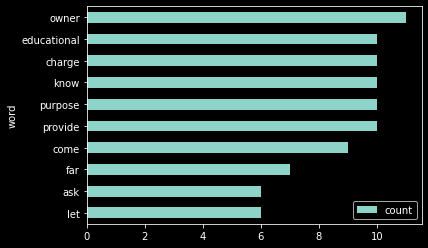

In [ ]:
word_count_robert_frost = pd.DataFrame({'word': vectorizer_robert_frost.get_feature_names(), 'count': np.asarray(data_vectorized_robert_frost.sum(axis=0))[0]})

word_count_robert_frost.sort_values('count', ascending=False).set_index('word')[:10].sort_values('count', ascending=True).plot(kind='barh')

**Frequent Words Used in CJ Dennis Poems**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


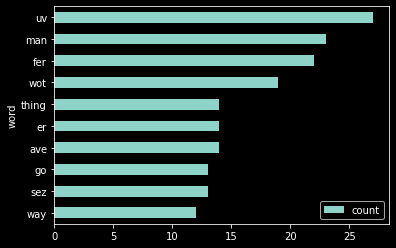

In [ ]:
word_count_cj_dennis = pd.DataFrame({'word': vectorizer_cj_dennis.get_feature_names(), 'count': np.asarray(data_vectorized_cj_dennis.sum(axis=0))[0]})

word_count_cj_dennis.sort_values('count', ascending=False).set_index('word')[:10].sort_values('count', ascending=True).plot(kind='barh')